# Import

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import gc
import matplotlib.pyplot as plt

import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

# EDA

### Data Load

In [36]:
# 데이터 분할(폴더) 구분
data_splits = ["train", "test"]

# 각 데이터 유형별 폴더명, 파일 접미사, 변수 접두어 설정
data_categories = {
    "회원정보": {"folder": "1.회원정보", "suffix": "회원정보", "var_prefix": "customer"},
    "신용정보": {"folder": "2.신용정보", "suffix": "신용정보", "var_prefix": "credit"},
    "승인매출정보": {"folder": "3.승인매출정보", "suffix": "승인매출정보", "var_prefix": "sales"},
    "청구정보": {"folder": "4.청구입금정보", "suffix": "청구정보", "var_prefix": "billing"},
    "잔액정보": {"folder": "5.잔액정보", "suffix": "잔액정보", "var_prefix": "balance"},
    "채널정보": {"folder": "6.채널정보", "suffix": "채널정보", "var_prefix": "channel"},
    "마케팅정보": {"folder": "7.마케팅정보", "suffix": "마케팅정보", "var_prefix": "marketing"},
    "성과정보": {"folder": "8.성과정보", "suffix": "성과정보", "var_prefix": "performance"}
}

# 2018년 7월부터 12월까지의 월 리스트
months = ['07', '08', '09', '10', '11', '12']

In [37]:
def dataLoad(data_splits: str, data_categories: dict, month: str):
    
    for category, info in data_categories.items():
        folder = info["folder"]
        suffix = info["suffix"]
        var_prefix = info["var_prefix"]
        
        # 파일명 형식: 2018{month}_{split}_{suffix}.parquet
        file_path = f"./datasets/{data_splits}/{folder}/2018{month}_{data_splits}_{suffix}.parquet"
        # 변수명 형식: {var_prefix}_{split}_{month}
        variable_name = f"{var_prefix}_{data_splits}_{month}"
        globals()[variable_name] = pd.read_parquet(file_path)
        print(f"{variable_name} is loaded from {file_path}")
    gc.collect()

## Customer Sheet

### 07월

In [134]:
dataLoad("train", data_categories, "07")
globals()['customer_train_07']

customer_train_07 is loaded from ./datasets/train/1.회원정보/201807_train_회원정보.parquet
credit_train_07 is loaded from ./datasets/train/2.신용정보/201807_train_신용정보.parquet
sales_train_07 is loaded from ./datasets/train/3.승인매출정보/201807_train_승인매출정보.parquet
billing_train_07 is loaded from ./datasets/train/4.청구입금정보/201807_train_청구정보.parquet
balance_train_07 is loaded from ./datasets/train/5.잔액정보/201807_train_잔액정보.parquet
channel_train_07 is loaded from ./datasets/train/6.채널정보/201807_train_채널정보.parquet
marketing_train_07 is loaded from ./datasets/train/7.마케팅정보/201807_train_마케팅정보.parquet
performance_train_07 is loaded from ./datasets/train/8.성과정보/201807_train_성과정보.parquet


,기준년월,ID,남녀구분코드,연령,Segment,회원여부_이용가능,회원여부_이용가능_CA,회원여부_이용가능_카드론,소지여부_신용,소지카드수_유효_신용,...,할인금액_제휴연회비_B0M,청구금액_기본연회비_B0M,청구금액_제휴연회비_B0M,상품관련면제카드수_B0M,임직원면제카드수_B0M,우수회원면제카드수_B0M,기타면제카드수_B0M,카드신청건수,Life_Stage,최종카드발급경과월
0,201807,TRAIN_000000,2,40대,D,1,1,0,1,1,...,0,0,0,0개,0개,0개,0개,0,자녀성장(2),22
1,201807,TRAIN_000001,1,30대,E,1,1,1,1,1,...,0,0,0,0개,0개,0개,0개,0,자녀성장(1),18
2,201807,TRAIN_000002,1,30대,C,1,1,0,1,1,...,0,0,0,0개,0개,0개,0개,0,자녀출산기,20
3,201807,TRAIN_000003,2,40대,D,1,1,0,1,2,...,0,0,0,0개,0개,0개,0개,1,자녀성장(2),17
4,201807,TRAIN_000004,2,40대,E,1,1,1,1,1,...,0,0,0,0개,0개,0개,0개,1,자녀성장(1),15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,201807,TRAIN_399995,2,70대이상,E,1,1,1,1,1,...,0,0,0,0개,0개,0개,0개,0,노년생활,34
399996,201807,TRAIN_399996,2,50대,D,1,1,1,1,1,...,0,0,0,0개,0개,0개,0개,0,자녀성장(2),19
399997,201807,TRAIN_399997,1,30대,C,1,1,0,1,1,...,0,0,0,0개,0개,0개,0개,0,자녀출산기,13
399998,201807,TRAIN_399998,1,40대,E,1,1,1,1,1,...,0,0,0,0개,0개,0개,0개,0,자녀성장(1),22


In [85]:
globals()['customer_train_07'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 78 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   기준년월                400000 non-null  int64  
 1   ID                  400000 non-null  object 
 2   남녀구분코드              400000 non-null  int64  
 3   연령                  400000 non-null  object 
 4   Segment             400000 non-null  object 
 5   회원여부_이용가능           400000 non-null  int64  
 6   회원여부_이용가능_CA        400000 non-null  int64  
 7   회원여부_이용가능_카드론       400000 non-null  int64  
 8   소지여부_신용             400000 non-null  int64  
 9   소지카드수_유효_신용         400000 non-null  int64  
 10  소지카드수_이용가능_신용       400000 non-null  int64  
 11  입회일자_신용             400000 non-null  int64  
 12  입회경과개월수_신용          400000 non-null  int64  
 13  회원여부_연체             400000 non-null  int64  
 14  이용거절여부_카드론          400000 non-null  int64  
 15  동의여부_한도증액안내         400000 non-nul

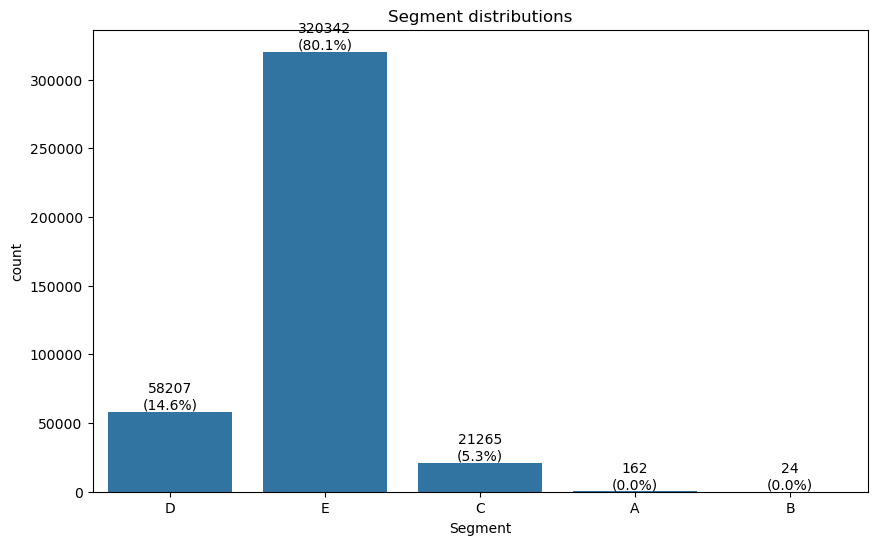

In [86]:
# target 
def value_counts_plot(df: pd.DataFrame, col: str):
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(x=col, data=df)
    total = len(df)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        count = int(p.get_height())
        ax.annotate(f'{count}\n({percentage})',  # 개수와 비율
                (p.get_x() + p.get_width()/2, p.get_height()),  # 위치
                ha='center',  # 수평 정렬
                va='bottom',  # 수직 정렬
                fontsize=10)  # 글자 크기

    plt.title(f'{col} distributions')
    plt.show()
value_counts_plot(globals()['customer_train_07'], 'Segment')

In [87]:
string_col_names = ['연령', '연회비발생카드수_B0M', '상품관련면제카드수_B0M', '임직원면제카드수_B0M', '우수회원면제카드수_B0M', '기타면제카드수_B0M']

def change_df_type_str2int(df: pd.DataFrame, cols: list):
    for col in cols:
        df[col] = df[col].astype(str).str.replace(r'[^0-9]', '', regex=True)
    df[cols] = df[cols].astype(int)
    return df

globals()['customer_train_07'] = change_df_type_str2int(globals()['customer_train_07'], string_col_names)


In [88]:
globals()['customer_train_07'].head()

,기준년월,ID,남녀구분코드,연령,Segment,회원여부_이용가능,회원여부_이용가능_CA,회원여부_이용가능_카드론,소지여부_신용,소지카드수_유효_신용,...,할인금액_제휴연회비_B0M,청구금액_기본연회비_B0M,청구금액_제휴연회비_B0M,상품관련면제카드수_B0M,임직원면제카드수_B0M,우수회원면제카드수_B0M,기타면제카드수_B0M,카드신청건수,Life_Stage,최종카드발급경과월
0,201807,TRAIN_000000,2,40,D,1,1,0,1,1,...,0,0,0,0,0,0,0,0,자녀성장(2),22
1,201807,TRAIN_000001,1,30,E,1,1,1,1,1,...,0,0,0,0,0,0,0,0,자녀성장(1),18
2,201807,TRAIN_000002,1,30,C,1,1,0,1,1,...,0,0,0,0,0,0,0,0,자녀출산기,20
3,201807,TRAIN_000003,2,40,D,1,1,0,1,2,...,0,0,0,0,0,0,0,1,자녀성장(2),17
4,201807,TRAIN_000004,2,40,E,1,1,1,1,1,...,0,0,0,0,0,0,0,1,자녀성장(1),15


In [89]:
missing_value_cols = [col for col in globals()['customer_train_07'].columns if globals()['customer_train_07'][col].isna().sum() != 0]
globals()['customer_train_07'][missing_value_cols].isna().sum().apply(lambda x: x/len(globals()['customer_train_07']))

가입통신회사코드          0.168410
직장시도명             0.102017
_1순위신용체크구분        0.005367
_2순위신용체크구분        0.394665
최종유효년월_신용_이용가능    0.082070
최종유효년월_신용_이용      0.198295
최종카드발급일자          0.007517
dtype: float64

In [90]:
# missing value 15% under면, 살리는 방향으로
# drop ['가입통신회사코드', '_2순위신용체크구분', '최종유효년월_신용_이용]
def drop_missing_col(df: pd.DataFrame):
    missing_value_cols = [col for col in df.columns if df[col].isna().sum() != 0]
    missing_value_cols = [col for col in missing_value_cols if df[col].isna().sum()/len(df) > 0.15]

    for col in missing_value_cols:
        df.drop(columns=[col], inplace=True)
    
    print(f"Dropped {len(missing_value_cols)} columns")
    print(f"Dropped columns: {missing_value_cols}")
    return df

globals()['customer_train_07'] = drop_missing_col(globals()['customer_train_07'])


Dropped 3 columns
Dropped columns: ['가입통신회사코드', '_2순위신용체크구분', '최종유효년월_신용_이용']


In [91]:
globals()['customer_train_07'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 75 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   기준년월                400000 non-null  int64  
 1   ID                  400000 non-null  object 
 2   남녀구분코드              400000 non-null  int64  
 3   연령                  400000 non-null  int64  
 4   Segment             400000 non-null  object 
 5   회원여부_이용가능           400000 non-null  int64  
 6   회원여부_이용가능_CA        400000 non-null  int64  
 7   회원여부_이용가능_카드론       400000 non-null  int64  
 8   소지여부_신용             400000 non-null  int64  
 9   소지카드수_유효_신용         400000 non-null  int64  
 10  소지카드수_이용가능_신용       400000 non-null  int64  
 11  입회일자_신용             400000 non-null  int64  
 12  입회경과개월수_신용          400000 non-null  int64  
 13  회원여부_연체             400000 non-null  int64  
 14  이용거절여부_카드론          400000 non-null  int64  
 15  동의여부_한도증액안내         400000 non-nul

In [92]:
def scan_col(df: pd.DataFrame):
    # dtype으로 숫자형 컬럼 추출
    number_cols = [col for col, dtype in df.dtypes.items() if dtype != 'object']
    categorical_cols = [col for col, dtype in df.dtypes.items() if dtype == 'object']
    
    # 결측치 확인.
    missing_value_cols = []
    for col_name, item in df.isna().sum().items():
        if item != 0:
            missing_value_cols.append(col_name)
    number_cols = [x for x in number_cols if x not in missing_value_cols]

    # col value가 하나 -> corr()에서 NaN
    unique_value_cols = []
    for col in df.columns:
        if df[col].nunique() == 1:
            unique_value_cols.append(col)
    
    
    number_cols = [x for x in number_cols if x not in unique_value_cols]
    
    return number_cols, missing_value_cols, unique_value_cols, categorical_cols
number_cols, missing_value_cols, unique_value_cols, categorical_cols = scan_col(globals()['customer_train_07'])

In [93]:
len(number_cols), len(missing_value_cols), len(unique_value_cols), len(categorical_cols)

(57, 4, 10, 6)

In [94]:
def apply_label_encoding(df, columns, encoders = None):
    # 인코더 딕셔너리 생성
    if encoders is None:
        encoders = {}
    df_encoded = df.copy()
    
    for col in columns:
        encoders[col] = LabelEncoder()
        df_encoded[col] = encoders[col].fit_transform(df[col])
    
    return df_encoded, encoders
globals()['customer_train_07'], encoders = apply_label_encoding(globals()['customer_train_07'], categorical_cols)  


In [95]:
globals()['customer_train_07'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 75 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   기준년월                400000 non-null  int64  
 1   ID                  400000 non-null  int64  
 2   남녀구분코드              400000 non-null  int64  
 3   연령                  400000 non-null  int64  
 4   Segment             400000 non-null  int64  
 5   회원여부_이용가능           400000 non-null  int64  
 6   회원여부_이용가능_CA        400000 non-null  int64  
 7   회원여부_이용가능_카드론       400000 non-null  int64  
 8   소지여부_신용             400000 non-null  int64  
 9   소지카드수_유효_신용         400000 non-null  int64  
 10  소지카드수_이용가능_신용       400000 non-null  int64  
 11  입회일자_신용             400000 non-null  int64  
 12  입회경과개월수_신용          400000 non-null  int64  
 13  회원여부_연체             400000 non-null  int64  
 14  이용거절여부_카드론          400000 non-null  int64  
 15  동의여부_한도증액안내         400000 non-nul

In [98]:
globals()['customer_train_07'].fillna(0, inplace=True)

In [99]:
globals()['customer_train_07'].isna().sum().any()

False

In [100]:
def confusion_matrix_plot(df: pd.DataFrame, target_col: str, name:str):
    corr = df[number_cols].corr()
    corr = corr.mask(corr.abs() < 0.5, 0)
    corr.style.background_gradient(cmap='coolwarm').to_html(f'{name}_corr.html')
confusion_matrix_plot(globals()['customer_train_07'], number_cols, 'customer_train_07')

In [167]:
def dataPreProcessing(flag: str, month: str, category:str):
        
    # tansfer some str col to int.
    if category == "customer":
        string_col_names = ['연령', '연회비발생카드수_B0M', '상품관련면제카드수_B0M', '임직원면제카드수_B0M', '우수회원면제카드수_B0M', '기타면제카드수_B0M']
    elif category == "credit":
        string_col_names = ['자발한도감액횟수_R12M', '한도증액횟수_R12M', '한도심사요청건수']
    elif category in ["sales", "billing", "channel", "marketing", "performance"]:
        string_col_names = []
    else:
        raise ValueError(f"Invalid category: {category}")
    
    globals()[f"{category}_train_{month}"] = change_df_type_str2int(globals()[f"{category}_train_{month}"], string_col_names)

    # drop missing value cols.
    globals()[f"{category}_train_{month}"] = drop_missing_col(globals()[f"{category}_train_{month}"])

    # scan col. 
    number_cols, missing_value_cols, unique_value_cols, categorical_cols = scan_col(globals()[f"{category}_train_{month}"])

    # label encoding.
    globals()[f"{category}_train_{month}"], encoders = apply_label_encoding(globals()[f"{category}_train_{month}"], categorical_cols)
    globals()[f"{category}_train_{month}"].fillna(0, inplace=True)

In [135]:
from sklearn.linear_model import LogisticRegression

for month in months:
    dataPreProcessing("train", month, "customer")
    model = LogisticRegression()
    model.fit(globals()[f'customer_train_{month}'].drop(columns=['Segment']), globals()[f'customer_train_{month}']['Segment'])
    print("Train Score: ", model.score(globals()[f'customer_train_{month}'].drop(columns=['Segment']), globals()[f'customer_train_{month}']['Segment']))


Dropped 3 columns
Dropped columns: ['가입통신회사코드', '_2순위신용체크구분', '최종유효년월_신용_이용']


/opt/anaconda3/envs/mldl/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train Score:  0.8238825
Dropped 0 columns
Dropped columns: []


/opt/anaconda3/envs/mldl/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train Score:  0.8322
Dropped 0 columns
Dropped columns: []


KeyboardInterrupt: 

In [112]:
print(months)

['07', '08', '09', '10', '11', '12']


### 08월

In [136]:
dataLoad("train", data_categories, "08")
globals()['customer_train_08']

customer_train_08 is loaded from ./datasets/train/1.회원정보/201808_train_회원정보.parquet
credit_train_08 is loaded from ./datasets/train/2.신용정보/201808_train_신용정보.parquet
sales_train_08 is loaded from ./datasets/train/3.승인매출정보/201808_train_승인매출정보.parquet
billing_train_08 is loaded from ./datasets/train/4.청구입금정보/201808_train_청구정보.parquet
balance_train_08 is loaded from ./datasets/train/5.잔액정보/201808_train_잔액정보.parquet
channel_train_08 is loaded from ./datasets/train/6.채널정보/201808_train_채널정보.parquet
marketing_train_08 is loaded from ./datasets/train/7.마케팅정보/201808_train_마케팅정보.parquet
performance_train_08 is loaded from ./datasets/train/8.성과정보/201808_train_성과정보.parquet


,기준년월,ID,남녀구분코드,연령,Segment,회원여부_이용가능,회원여부_이용가능_CA,회원여부_이용가능_카드론,소지여부_신용,소지카드수_유효_신용,...,할인금액_제휴연회비_B0M,청구금액_기본연회비_B0M,청구금액_제휴연회비_B0M,상품관련면제카드수_B0M,임직원면제카드수_B0M,우수회원면제카드수_B0M,기타면제카드수_B0M,카드신청건수,Life_Stage,최종카드발급경과월
0,201808,TRAIN_000000,2,40대,D,1,1,0,1,1,...,0,0,0,0개,0개,0개,0개,0,자녀성장(2),23
1,201808,TRAIN_000001,1,30대,E,1,1,1,1,1,...,0,0,0,0개,0개,0개,0개,0,자녀성장(1),19
2,201808,TRAIN_000002,1,30대,C,1,1,0,1,1,...,0,0,0,0개,0개,0개,0개,0,자녀출산기,21
3,201808,TRAIN_000003,2,40대,D,1,1,0,1,2,...,0,0,0,0개,0개,0개,0개,1,자녀성장(2),18
4,201808,TRAIN_000004,2,40대,E,1,1,1,1,1,...,0,0,0,0개,0개,0개,0개,1,자녀성장(1),16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,201808,TRAIN_399995,2,70대이상,E,1,1,1,1,1,...,0,0,0,0개,0개,0개,0개,0,노년생활,35
399996,201808,TRAIN_399996,2,50대,D,1,1,1,1,1,...,0,0,0,0개,0개,0개,0개,0,자녀성장(2),20
399997,201808,TRAIN_399997,1,30대,C,1,1,0,1,1,...,0,0,0,0개,0개,0개,0개,0,자녀출산기,14
399998,201808,TRAIN_399998,1,40대,E,1,1,1,1,1,...,0,0,0,0개,0개,0개,0개,0,자녀성장(1),23


In [139]:
globals()['customer_train_08'][target_col] = le.transform(globals()['customer_train_08'][target_col])

In [140]:
globals()['customer_train_08'].head()

,기준년월,ID,남녀구분코드,연령,Segment,회원여부_이용가능,회원여부_이용가능_CA,회원여부_이용가능_카드론,소지여부_신용,소지카드수_유효_신용,...,할인금액_제휴연회비_B0M,청구금액_기본연회비_B0M,청구금액_제휴연회비_B0M,상품관련면제카드수_B0M,임직원면제카드수_B0M,우수회원면제카드수_B0M,기타면제카드수_B0M,카드신청건수,Life_Stage,최종카드발급경과월
0,201808,TRAIN_000000,2,40대,3,1,1,0,1,1,...,0,0,0,0개,0개,0개,0개,0,자녀성장(2),23
1,201808,TRAIN_000001,1,30대,4,1,1,1,1,1,...,0,0,0,0개,0개,0개,0개,0,자녀성장(1),19
2,201808,TRAIN_000002,1,30대,2,1,1,0,1,1,...,0,0,0,0개,0개,0개,0개,0,자녀출산기,21
3,201808,TRAIN_000003,2,40대,3,1,1,0,1,2,...,0,0,0,0개,0개,0개,0개,1,자녀성장(2),18
4,201808,TRAIN_000004,2,40대,4,1,1,1,1,1,...,0,0,0,0개,0개,0개,0개,1,자녀성장(1),16


In [141]:
number_cols, missing_value_cols, unique_value_cols = scan_col(globals()['customer_train_08'])
confusion_matrix_plot(globals()['customer_train_08'], number_cols, 'customer_train_08')

### 비슷한 결향을 보이고 일부 특성 간 높은 상관 검출

높은 상관관계를 가진 변수쌍:
기준년월: ['기준년월', 'ID', '남녀구분코드', '연령', '회원여부_이용가능', '회원여부_이용가능_CA', '회원여부_이용가능_카드론', '소지여부_신용', '소지카드수_유효_신용', '소지카드수_이용가능_신용', '입회일자_신용', '입회경과개월수_신용', '회원여부_연체', '이용거절여부_카드론', '동의여부_한도증액안내', '수신거부여부_TM', '수신거부여부_DM', '수신거부여부_메일', '수신거부여부_SMS', '탈회횟수_누적', '최종탈회후경과월', '탈회횟수_발급6개월이내', '탈회횟수_발급1년이내', '거주시도명', '직장시도명', '마케팅동의여부', '유효카드수_신용체크', '유효카드수_신용', '유효카드수_신용_가족', '유효카드수_체크', '유효카드수_체크_가족', '이용가능카드수_신용체크', '이용가능카드수_신용', '이용가능카드수_신용_가족', '이용가능카드수_체크', '이용가능카드수_체크_가족', '이용카드수_신용체크', '이용카드수_신용', '이용카드수_신용_가족', '이용카드수_체크', '이용카드수_체크_가족', '이용금액_R3M_신용체크', '이용금액_R3M_신용', '이용금액_R3M_신용_가족', '이용금액_R3M_체크', '이용금액_R3M_체크_가족', '_1순위카드이용금액', '_1순위카드이용건수', '_1순위신용체크구분', '_2순위카드이용금액', '_2순위카드이용건수', '최종유효년월_신용_이용가능', '최종카드발급일자', '보유여부_해외겸용_본인', '이용가능여부_해외겸용_본인', '이용여부_3M_해외겸용_본인', '보유여부_해외겸용_신용_본인', '이용가능여부_해외겸용_신용_본인', '이용여부_3M_해외겸용_신용_본인', '연회비발생카드수_B0M', '연회비할인카드수_B0M', '기본연회비_B0M', '제휴연회비_B0M', '할인금액_기본연회비_B0M', '할인금액_제휴연회비_B0M', '청구금액_기본연회비_B0M', '청구금액_제휴연회비_B0M', '상품관련면제카드수_B0M

/opt/anaconda3/envs/mldl/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


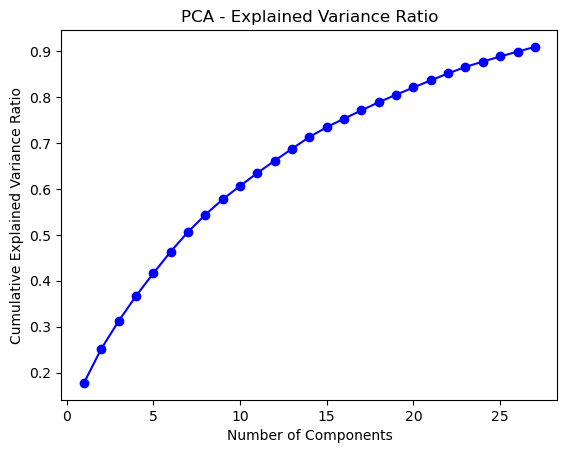

In [145]:
# 1. 상관관계가 높은 변수 중 하나 선택
# 도메인 지식을 바탕으로 더 중요한 변수 선택
def dimension_reduction(df: pd.DataFrame):
    if 'Segment' in df.columns:
        correlation = df.drop(columns=['Segment']).corr()
    else:
        correlation = df.corr()
    high_correlation = correlation.mask(abs(correlation) <= 0.9, 0)
        
    print("높은 상관관계를 가진 변수쌍:")
    for col in high_correlation.columns:
        highly_corr = high_correlation[col][high_correlation[col] != 0]
        if len(highly_corr) > 1:  # 자기 자신 제외
            print(f"{col}: {highly_corr.index.tolist()}")


    # 2. PCA (Principal Component Analysis) 사용
    from sklearn.preprocessing import StandardScaler
    from sklearn.decomposition import PCA

    # 데이터 스케일링
    scaler = StandardScaler()
    if 'Segment' in df.columns:
        scaled_data = scaler.fit_transform(df.drop(columns=['Segment']))
    else:
        scaled_data = scaler.fit_transform(df)

    # PCA 적용
    pca = PCA(n_components=0.9)
    pca_data = pca.fit_transform(scaled_data)
    print(f"PCA Data Shape: {pca_data.shape}")
    print(pca.components_)

    # 설명된 분산 비율 확인
    explained_variance_ratio = pca.explained_variance_ratio_
    cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

    pca_model = LogisticRegression()
    pca_model.fit(pca_data, globals()[f"customer_train_{month}"]["Segment"])
    print("Train Score: ", pca_model.score(pca_data, globals()[f"customer_train_{month}"]["Segment"]))


    # 결과 시각화
    import matplotlib.pyplot as plt

    plt.plot(range(1, len(cumulative_variance_ratio) + 1), 
         cumulative_variance_ratio, 'bo-')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance Ratio')
    plt.title('PCA - Explained Variance Ratio')
    plt.show()

# 차원 축소 65개 -> 30개 정도의 feature로도 충분히 기능할 것으로 예상.
# 0.823 -> 0.843
dimension_reduction(globals()['customer_train_07'])

## Credit Sheet

### 7월

In [138]:
globals()['credit_train_07'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 42 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   기준년월            400000 non-null  int64  
 1   ID              400000 non-null  object 
 2   최초한도금액          400000 non-null  int64  
 3   카드이용한도금액        400000 non-null  int64  
 4   CA한도금액          400000 non-null  int64  
 5   일시상환론한도금액       400000 non-null  int64  
 6   월상환론한도금액        400000 non-null  int64  
 7   CA이자율_할인전       400000 non-null  float64
 8   CL이자율_할인전       400000 non-null  float64
 9   RV일시불이자율_할인전    400000 non-null  float64
 10  RV현금서비스이자율_할인전  400000 non-null  float64
 11  RV신청일자          74921 non-null   float64
 12  RV약정청구율         400000 non-null  float64
 13  RV최소결제비율        400000 non-null  float64
 14  자발한도감액횟수_R12M   400000 non-null  object 
 15  자발한도감액금액_R12M   400000 non-null  int64  
 16  자발한도감액후경과월      400000 non-null  int64  
 17  강제한도감액횟수_R

In [139]:
dataPreProcessing("train", "07", "credit")

Dropped 1 columns
Dropped columns: ['RV신청일자']


높은 상관관계를 가진 변수쌍:
기준년월: ['기준년월', 'ID', '최초한도금액', '카드이용한도금액', 'CA한도금액', '일시상환론한도금액', '월상환론한도금액', 'CA이자율_할인전', 'CL이자율_할인전', 'RV일시불이자율_할인전', 'RV현금서비스이자율_할인전', 'RV약정청구율', 'RV최소결제비율', '자발한도감액횟수_R12M', '자발한도감액금액_R12M', '자발한도감액후경과월', '강제한도감액횟수_R12M', '강제한도감액금액_R12M', '강제한도감액후경과월', '한도증액횟수_R12M', '한도증액금액_R12M', '한도증액후경과월', '상향가능한도금액', '상향가능CA한도금액', '카드론동의여부', '월상환론상향가능한도금액', 'RV전환가능여부', '일시불ONLY전환가능여부', '카드이용한도금액_B1M', '카드이용한도금액_B2M', '특별한도보유여부_R3M', '연체감액여부_R3M', '한도심사요청건수', '한도요청거절건수', '한도심사요청후경과월', '한도심사거절후경과월', '시장단기연체여부_R6M', '시장단기연체여부_R3M', '시장연체상환여부_R6M', '시장연체상환여부_R3M', 'rv최초시작후경과일']
ID: ['기준년월', 'ID', '시장연체상환여부_R3M']
최초한도금액: ['기준년월', '최초한도금액', '시장연체상환여부_R3M']
카드이용한도금액: ['기준년월', '카드이용한도금액', 'CA한도금액', '카드이용한도금액_B1M', '카드이용한도금액_B2M', '시장연체상환여부_R3M']
CA한도금액: ['기준년월', '카드이용한도금액', 'CA한도금액', '카드이용한도금액_B1M', '시장연체상환여부_R3M']
일시상환론한도금액: ['기준년월', '일시상환론한도금액', '시장연체상환여부_R3M']
월상환론한도금액: ['기준년월', '월상환론한도금액', '시장연체상환여부_R3M']
CA이자율_할인전: ['기준년월', 'CA이자율_할인전', 'RV일시불이자율_할인전', 'RV현금서비스이자율_할인전', '시장연체상환여부

/opt/anaconda3/envs/mldl/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


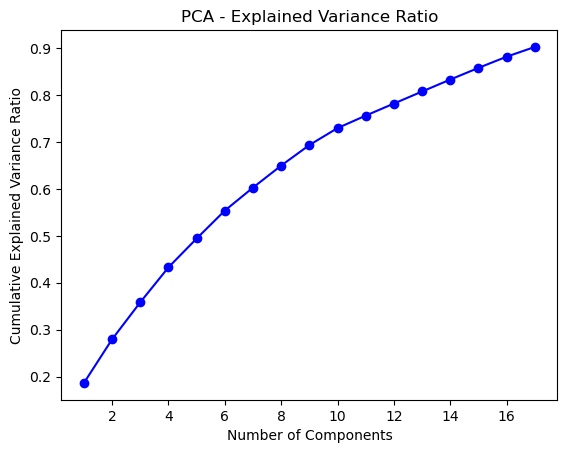

In [146]:
# 대략 33 -> 17정도
dimension_reduction(globals()['credit_train_07'])

역시 거의 동일한 결과. 7월과 8월 사이 유의미한 차이는 없음.

## Sales

In [149]:
globals()['sales_train_07'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Columns: 406 entries, 기준년월 to 이용금액대
dtypes: float64(3), int64(385), object(18)
memory usage: 1.2+ GB


In [ ]:
# str -> int로 바꿀 수 있는 col은 없음.
globals()['sales_train_07'][[col for col, dtype in globals()['sales_train_07'].dtypes.items() if dtype == 'object']]


,ID,_1순위업종,_2순위업종,_3순위업종,_1순위쇼핑업종,_2순위쇼핑업종,_3순위쇼핑업종,_1순위교통업종,_2순위교통업종,_3순위교통업종,_1순위여유업종,_2순위여유업종,_3순위여유업종,_1순위납부업종,_2순위납부업종,_3순위납부업종,최종카드론_신청경로코드,이용금액대
0,TRAIN_000000,납부,쇼핑,사교활동,쇼핑기타,None,None,택시,버스지하철,None,None,None,None,보험료,납부기타,None,None,01.100만원+
1,TRAIN_000001,쇼핑,납부,교통,도소매,슈퍼마켓,편의점,주유,철도버스,None,None,None,None,통신비,None,None,8,03.30만원+
2,TRAIN_000002,쇼핑,사교활동,교통,온라인,도소매,마트,주유,None,None,None,None,None,None,None,None,8,01.100만원+
3,TRAIN_000003,쇼핑,납부,사교활동,마트,슈퍼마켓,None,택시,None,None,None,None,None,보험료,None,None,None,01.100만원+
4,TRAIN_000004,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,09.미사용
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,TRAIN_399995,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,09.미사용
399996,TRAIN_399996,의료,쇼핑,사교활동,도소매,백화점,슈퍼마켓,버스지하철,철도버스,택시,None,None,None,납부기타,None,None,8,01.100만원+
399997,TRAIN_399997,쇼핑,교통,사교활동,온라인,슈퍼마켓,쇼핑기타,주유,정비,None,운동,None,None,None,None,None,None,02.50만원+
399998,TRAIN_399998,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,09.미사용


In [162]:
dataPreProcessing("train", "07", "sales")

Dropped 18 columns
Dropped columns: ['_1순위업종', '_2순위업종', '_3순위업종', '_1순위쇼핑업종', '_2순위쇼핑업종', '_3순위쇼핑업종', '_1순위교통업종', '_2순위교통업종', '_3순위교통업종', '_1순위여유업종', '_2순위여유업종', '_3순위여유업종', '_1순위납부업종', '_2순위납부업종', '_3순위납부업종', '최종카드론_금융상환방식코드', '최종카드론_신청경로코드', '최종카드론_대출일자']


높은 상관관계를 가진 변수쌍:
기준년월: ['기준년월', 'ID', '최종이용일자_기본', '최종이용일자_신판', '최종이용일자_CA', '최종이용일자_카드론', '최종이용일자_체크', '최종이용일자_일시불', '최종이용일자_할부', '이용건수_신용_B0M', '이용건수_신판_B0M', '이용건수_일시불_B0M', '이용건수_할부_B0M', '이용건수_할부_유이자_B0M', '이용건수_할부_무이자_B0M', '이용건수_부분무이자_B0M', '이용건수_CA_B0M', '이용건수_체크_B0M', '이용건수_카드론_B0M', '이용금액_일시불_B0M', '이용금액_할부_B0M', '이용금액_할부_유이자_B0M', '이용금액_할부_무이자_B0M', '이용금액_부분무이자_B0M', '이용금액_CA_B0M', '이용금액_체크_B0M', '이용금액_카드론_B0M', '이용후경과월_신용', '이용후경과월_신판', '이용후경과월_일시불', '이용후경과월_할부', '이용후경과월_할부_유이자', '이용후경과월_할부_무이자', '이용후경과월_부분무이자', '이용후경과월_CA', '이용후경과월_체크', '이용후경과월_카드론', '이용건수_신용_R12M', '이용건수_신판_R12M', '이용건수_일시불_R12M', '이용건수_할부_R12M', '이용건수_할부_유이자_R12M', '이용건수_할부_무이자_R12M', '이용건수_부분무이자_R12M', '이용건수_CA_R12M', '이용건수_체크_R12M', '이용건수_카드론_R12M', '이용금액_일시불_R12M', '이용금액_할부_R12M', '이용금액_할부_유이자_R12M', '이용금액_할부_무이자_R12M', '이용금액_부분무이자_R12M', '이용금액_CA_R12M', '이용금액_체크_R12M', '이용금액_카드론_R12M', '최대이용금액_일시불_R12M', '최대이용금액_할부_R12M', '최대이용금액_할부_유이자_R12M', '최대이용금액_할부_무이자_R12M', '최대이용금액_부분무이자_R12M', '최대이용금액_CA_R12

/opt/anaconda3/envs/mldl/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


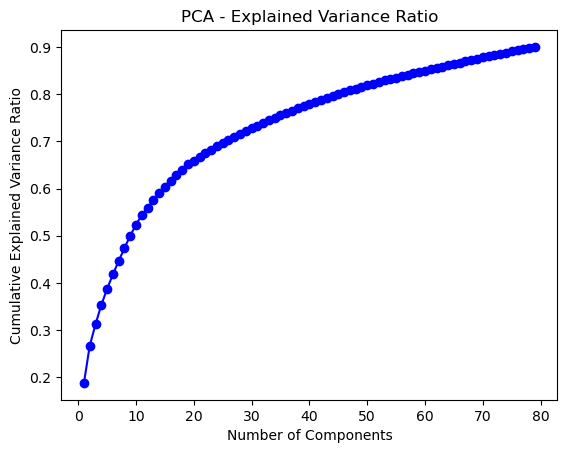

In [164]:
# 대략 349 -> 약 80~90개 정도
dimension_reduction(globals()['sales_train_07'])

## Billing

In [165]:
# str -> int로 바꿀 수 있는 col 없음. 마지막 2개의 경우, 급간이 크므로 범주형으로 취급.
globals()['billing_train_07'][[col for col, dtype in globals()['billing_train_07'].dtypes.items() if dtype == 'object']]


,ID,대표결제방법코드,대표청구지고객주소구분코드,대표청구서수령지구분코드,청구서수령방법,할인건수_R3M,할인건수_B0M
0,TRAIN_000000,자동이체,미확인,당사페이앱+이메일,문자메세지,1회 이상,1회 이상
1,TRAIN_000001,자동이체,주거지,우편,우편,1회 이상,1회 이상
2,TRAIN_000002,자동이체,미확인,이메일,이메일,1회 이상,1회 이상
3,TRAIN_000003,자동이체,주거지,우편,우편,1회 이상,1회 이상
4,TRAIN_000004,자동이체,주거지,우편,우편,1회 이상,1회 이상
...,...,...,...,...,...,...,...
399995,TRAIN_399995,자동이체,주거지,우편,우편,1회 이상,1회 이상
399996,TRAIN_399996,자동이체,미확인,이메일,이메일,1회 이상,1회 이상
399997,TRAIN_399997,자동이체,회사,우편,우편,1회 이상,1회 이상
399998,TRAIN_399998,자동이체,주거지,우편,우편,1회 이상,1회 이상


In [168]:
dataPreProcessing("train", "07", "billing")

Dropped 0 columns
Dropped columns: []


높은 상관관계를 가진 변수쌍:
기준년월: ['기준년월', 'ID', '대표결제일', '대표결제방법코드', '대표청구지고객주소구분코드', '대표청구서수령지구분코드', '청구서수령방법', '청구서발송여부_B0', '청구서발송여부_R3M', '청구서발송여부_R6M', '청구금액_B0', '청구금액_R3M', '청구금액_R6M', '포인트_마일리지_건별_B0M', '포인트_마일리지_건별_R3M', '포인트_포인트_건별_B0M', '포인트_포인트_건별_R3M', '포인트_마일리지_월적립_B0M', '포인트_마일리지_월적립_R3M', '포인트_포인트_월적립_B0M', '포인트_포인트_월적립_R3M', '포인트_적립포인트_R12M', '포인트_적립포인트_R3M', '포인트_이용포인트_R12M', '포인트_이용포인트_R3M', '포인트_잔여포인트_B0M', '마일_적립포인트_R12M', '마일_적립포인트_R3M', '마일_이용포인트_R12M', '마일_이용포인트_R3M', '마일_잔여포인트_B0M', '할인건수_R3M', '할인금액_R3M', '할인건수_B0M', '할인금액_B0M', '할인금액_청구서_R3M', '할인금액_청구서_B0M', '상환개월수_결제일_R6M', '상환개월수_결제일_R3M', '선결제건수_R6M', '선결제건수_R3M', '연체건수_R6M', '연체건수_R3M', '혜택수혜금액_R3M', '포인트_마일리지_환산_B0M', '혜택수혜금액']
ID: ['기준년월', 'ID', '대표결제방법코드']
대표결제일: ['기준년월', '대표결제일', '대표결제방법코드']
대표결제방법코드: ['기준년월', 'ID', '대표결제일', '대표결제방법코드', '대표청구지고객주소구분코드', '대표청구서수령지구분코드', '청구서수령방법', '청구서발송여부_B0', '청구서발송여부_R3M', '청구서발송여부_R6M', '청구금액_B0', '청구금액_R3M', '청구금액_R6M', '포인트_마일리지_건별_B0M', '포인트_마일리지_건별_R3M', '포인트_포인트_건별_B0M

/opt/anaconda3/envs/mldl/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


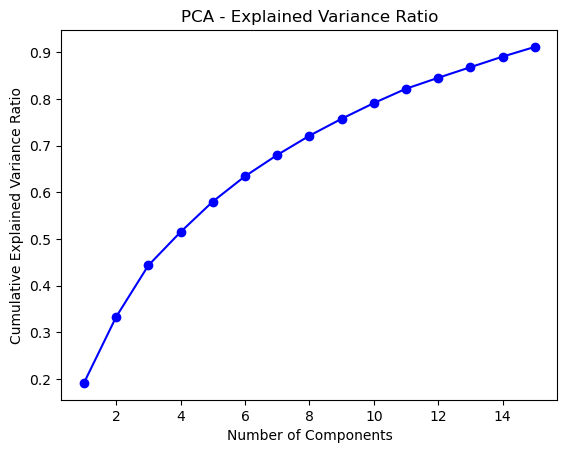

In [169]:
dimension_reduction(globals()['billing_train_07'])

## Channel

In [170]:
# str -> int로 바꿀 수 있는 col 없음. 마지막 2개의 경우, 급간이 크므로 범주형으로 취급.
globals()['channel_train_07'][[col for col, dtype in globals()['channel_train_07'].dtypes.items() if dtype == 'object']]

,ID,인입횟수_ARS_R6M,이용메뉴건수_ARS_R6M,방문횟수_PC_R6M,방문일수_PC_R6M,방문횟수_앱_R6M,OS구분코드
0,TRAIN_000000,10회 이상,10회 이상,1회 이상,1회 이상,1회 이상,Android
1,TRAIN_000001,1회 이상,1회 이상,1회 이상,1회 이상,1회 이상,None
2,TRAIN_000002,1회 이상,1회 이상,10회 이상,10회 이상,30회 이상,Android
3,TRAIN_000003,10회 이상,10회 이상,1회 이상,1회 이상,1회 이상,Android
4,TRAIN_000004,1회 이상,1회 이상,1회 이상,1회 이상,1회 이상,Android
...,...,...,...,...,...,...,...
399995,TRAIN_399995,1회 이상,1회 이상,1회 이상,1회 이상,1회 이상,None
399996,TRAIN_399996,1회 이상,1회 이상,1회 이상,1회 이상,1회 이상,None
399997,TRAIN_399997,1회 이상,1회 이상,1회 이상,1회 이상,1회 이상,None
399998,TRAIN_399998,1회 이상,1회 이상,1회 이상,1회 이상,1회 이상,None


In [171]:
dataPreProcessing("train", "07", "channel")

Dropped 1 columns
Dropped columns: ['OS구분코드']


높은 상관관계를 가진 변수쌍:
기준년월: ['기준년월', 'ID', '인입횟수_ARS_R6M', '이용메뉴건수_ARS_R6M', '인입일수_ARS_R6M', '인입월수_ARS_R6M', '인입후경과월_ARS', '인입횟수_ARS_B0M', '이용메뉴건수_ARS_B0M', '인입일수_ARS_B0M', '방문횟수_PC_R6M', '방문일수_PC_R6M', '방문월수_PC_R6M', '방문후경과월_PC_R6M', '방문횟수_앱_R6M', '방문일수_앱_R6M', '방문월수_앱_R6M', '방문후경과월_앱_R6M', '방문횟수_모바일웹_R6M', '방문일수_모바일웹_R6M', '방문월수_모바일웹_R6M', '방문후경과월_모바일웹_R6M', '방문횟수_PC_B0M', '방문일수_PC_B0M', '방문횟수_앱_B0M', '방문일수_앱_B0M', '방문횟수_모바일웹_B0M', '방문일수_모바일웹_B0M', '인입횟수_IB_R6M', '인입횟수_금융_IB_R6M', '인입일수_IB_R6M', '인입월수_IB_R6M', '이용메뉴건수_IB_R6M', '인입후경과월_IB_R6M', '인입횟수_IB_B0M', '인입일수_IB_B0M', '이용메뉴건수_IB_B0M', '인입불만횟수_IB_R6M', '인입불만일수_IB_R6M', '인입불만월수_IB_R6M', '인입불만후경과월_IB_R6M', '인입불만횟수_IB_B0M', '인입불만일수_IB_B0M', '상담건수_B0M', 'IB문의건수_사용승인내역_B0M', 'IB문의건수_한도_B0M', 'IB문의건수_선결제_B0M', 'IB문의건수_결제_B0M', 'IB문의건수_할부_B0M', 'IB문의건수_정보변경_B0M', 'IB문의건수_결제일변경_B0M', 'IB문의건수_명세서_B0M', 'IB문의건수_비밀번호_B0M', 'IB문의건수_SMS_B0M', 'IB문의건수_APP_B0M', 'IB문의건수_부대서비스_B0M', 'IB문의건수_포인트_B0M', 'IB문의건수_카드발급_B0M', 'IB문의건수_BL_B0M', 'IB문의건수_분실도난_B

/opt/anaconda3/envs/mldl/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


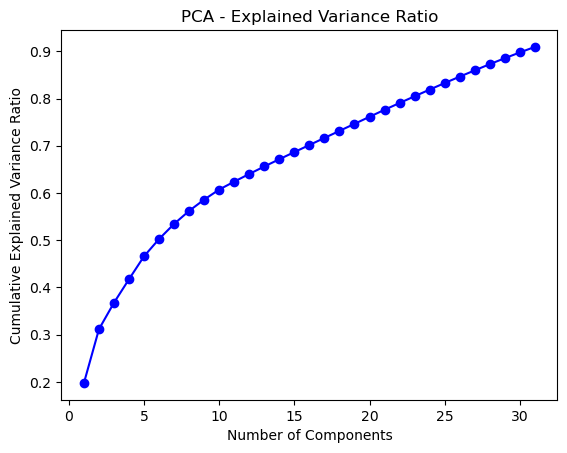

In [172]:
dimension_reduction(globals()['channel_train_07'])

## Marketing

In [173]:
# str -> int로 바꿀 수 있는 col 없음. 마지막 2개의 경우, 급간이 크므로 범주형으로 취급.
globals()['marketing_train_07'][[col for col, dtype in globals()['marketing_train_07'].dtypes.items() if dtype == 'object']]

,ID,캠페인접촉건수_R12M,캠페인접촉일수_R12M
0,TRAIN_000000,1회 이상,1일 이상
1,TRAIN_000001,15회 이상,10일 이상
2,TRAIN_000002,1회 이상,1일 이상
3,TRAIN_000003,1회 이상,1일 이상
4,TRAIN_000004,1회 이상,1일 이상
...,...,...,...
399995,TRAIN_399995,1회 이상,1일 이상
399996,TRAIN_399996,15회 이상,15일 이상
399997,TRAIN_399997,1회 이상,1일 이상
399998,TRAIN_399998,1회 이상,1일 이상


In [174]:
dataPreProcessing("train", "07", "marketing")

Dropped 0 columns
Dropped columns: []


높은 상관관계를 가진 변수쌍:
기준년월: ['기준년월', 'ID', '컨택건수_카드론_TM_B0M', '컨택건수_리볼빙_TM_B0M', '컨택건수_CA_TM_B0M', '컨택건수_이용유도_TM_B0M', '컨택건수_신용발급_TM_B0M', '컨택건수_부대서비스_TM_B0M', '컨택건수_포인트소진_TM_B0M', '컨택건수_보험_TM_B0M', '컨택건수_카드론_LMS_B0M', '컨택건수_CA_LMS_B0M', '컨택건수_리볼빙_LMS_B0M', '컨택건수_이용유도_LMS_B0M', '컨택건수_카드론_EM_B0M', '컨택건수_CA_EM_B0M', '컨택건수_리볼빙_EM_B0M', '컨택건수_이용유도_EM_B0M', '컨택건수_카드론_청구서_B0M', '컨택건수_CA_청구서_B0M', '컨택건수_리볼빙_청구서_B0M', '컨택건수_이용유도_청구서_B0M', '컨택건수_카드론_인터넷_B0M', '컨택건수_CA_인터넷_B0M', '컨택건수_리볼빙_인터넷_B0M', '컨택건수_이용유도_인터넷_B0M', '컨택건수_카드론_당사앱_B0M', '컨택건수_CA_당사앱_B0M', '컨택건수_리볼빙_당사앱_B0M', '컨택건수_이용유도_당사앱_B0M', '컨택건수_카드론_TM_R6M', '컨택건수_CA_TM_R6M', '컨택건수_리볼빙_TM_R6M', '컨택건수_이용유도_TM_R6M', '컨택건수_신용발급_TM_R6M', '컨택건수_부대서비스_TM_R6M', '컨택건수_포인트소진_TM_R6M', '컨택건수_보험_TM_R6M', '컨택건수_카드론_LMS_R6M', '컨택건수_CA_LMS_R6M', '컨택건수_리볼빙_LMS_R6M', '컨택건수_이용유도_LMS_R6M', '컨택건수_카드론_EM_R6M', '컨택건수_CA_EM_R6M', '컨택건수_리볼빙_EM_R6M', '컨택건수_이용유도_EM_R6M', '컨택건수_카드론_청구서_R6M', '컨택건수_CA_청구서_R6M', '컨택건수_리볼빙_청구서_R6M', '컨택건수_이용유도_청구서_R6M', '컨택건수_카드론_인터넷_R6M'

/opt/anaconda3/envs/mldl/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


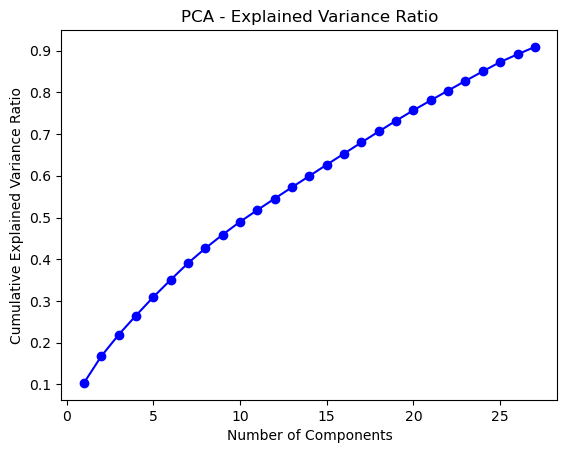

In [175]:
dimension_reduction(globals()['marketing_train_07'])

## Performances

In [176]:
# str -> int로 바꿀 수 있는 col 없음. 마지막 2개의 경우, 급간이 크므로 범주형으로 취급.
globals()['performance_train_07'][[col for col, dtype in globals()['performance_train_07'].dtypes.items() if dtype == 'object']]

,ID
0,TRAIN_000000
1,TRAIN_000001
2,TRAIN_000002
3,TRAIN_000003
4,TRAIN_000004
...,...
399995,TRAIN_399995
399996,TRAIN_399996
399997,TRAIN_399997
399998,TRAIN_399998


In [177]:
dataPreProcessing("train", "07", "performance")

Dropped 2 columns
Dropped columns: ['혜택수혜율_R3M', '혜택수혜율_B0M']


높은 상관관계를 가진 변수쌍:
기준년월: ['기준년월', 'ID', '증감율_이용건수_신용_전월', '증감율_이용건수_신판_전월', '증감율_이용건수_일시불_전월', '증감율_이용건수_할부_전월', '증감율_이용건수_CA_전월', '증감율_이용건수_체크_전월', '증감율_이용건수_카드론_전월', '증감율_이용금액_신용_전월', '증감율_이용금액_신판_전월', '증감율_이용금액_일시불_전월', '증감율_이용금액_할부_전월', '증감율_이용금액_CA_전월', '증감율_이용금액_체크_전월', '증감율_이용금액_카드론_전월', '증감율_이용건수_신용_분기', '증감율_이용건수_신판_분기', '증감율_이용건수_일시불_분기', '증감율_이용건수_할부_분기', '증감율_이용건수_CA_분기', '증감율_이용건수_체크_분기', '증감율_이용건수_카드론_분기', '증감율_이용금액_신용_분기', '증감율_이용금액_신판_분기', '증감율_이용금액_일시불_분기', '증감율_이용금액_할부_분기', '증감율_이용금액_CA_분기', '증감율_이용금액_체크_분기', '증감율_이용금액_카드론_분기', '잔액_신판평균한도소진율_r6m', '잔액_신판최대한도소진율_r6m', '잔액_신판평균한도소진율_r3m', '잔액_신판최대한도소진율_r3m', '잔액_신판ca평균한도소진율_r6m', '잔액_신판ca최대한도소진율_r6m', '잔액_신판ca평균한도소진율_r3m', '잔액_신판ca최대한도소진율_r3m', '변동률_일시불평잔', '변동률_RV일시불평잔', '변동률_할부평잔', '변동률_CA평잔', '변동률_RVCA평잔', '변동률_카드론평잔', '변동률_잔액_B1M', '변동률_잔액_일시불_B1M', '변동률_잔액_CA_B1M']
ID: ['기준년월', 'ID']
증감율_이용건수_신용_전월: ['기준년월', '증감율_이용건수_신용_전월', '증감율_이용건수_신판_전월', '증감율_이용건수_일시불_전월']
증감율_이용건수_신판_전월: ['기준년월', '증감율_이용건수_신용_전월', '증감율_이용건수_신판

/opt/anaconda3/envs/mldl/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


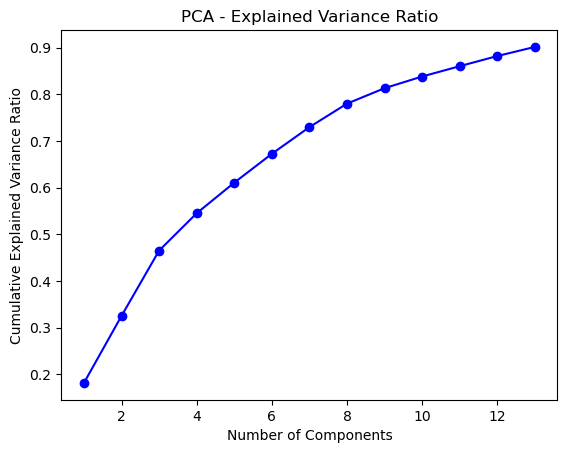

In [178]:
dimension_reduction(globals()['performance_train_07'])

# Data Preprocessing(1) : Concat & Merge

In [3]:
# 데이터 유형별 설정 
info_categories = ["customer", "credit", "sales", "billing", "balance", "channel", "marketing", "performance"]

# 월 설정
months = ['07', '08', '09', '10', '11', '12']

In [4]:
#### Train ####

# 각 유형별로 월별 데이터를 합쳐서 새로운 변수에 저장
train_dfs = {}

for prefix in info_categories:
    # globals()에서 동적 변수명으로 데이터프레임들을 가져와 리스트에 저장
    df_list = [globals()[f"{prefix}_train_{month}"] for month in months]
    train_dfs[f"{prefix}_train_df"] = pd.concat(df_list, axis=0)
    gc.collect()
    print(f"{prefix}_train_df is created with shape: {train_dfs[f'{prefix}_train_df'].shape}")


customer_train_df = train_dfs["customer_train_df"]
credit_train_df   = train_dfs["credit_train_df"]
sales_train_df    = train_dfs["sales_train_df"]
billing_train_df  = train_dfs["billing_train_df"]
balance_train_df  = train_dfs["balance_train_df"]
channel_train_df  = train_dfs["channel_train_df"]
marketing_train_df= train_dfs["marketing_train_df"]
performance_train_df = train_dfs["performance_train_df"]

gc.collect()

customer_train_df is created with shape: (2400000, 78)
credit_train_df is created with shape: (2400000, 42)
sales_train_df is created with shape: (2400000, 406)
billing_train_df is created with shape: (2400000, 46)
balance_train_df is created with shape: (2400000, 82)
channel_train_df is created with shape: (2400000, 105)
marketing_train_df is created with shape: (2400000, 64)
performance_train_df is created with shape: (2400000, 49)


0

In [5]:
#### Test ####

# test 데이터에 대해 train과 동일한 방법 적용
test_dfs = {}

for prefix in info_categories:
    df_list = [globals()[f"{prefix}_test_{month}"] for month in months]
    test_dfs[f"{prefix}_test_df"] = pd.concat(df_list, axis=0)
    gc.collect()
    print(f"{prefix}_test_df is created with shape: {test_dfs[f'{prefix}_test_df'].shape}")


customer_test_df = test_dfs["customer_test_df"]
credit_test_df   = test_dfs["credit_test_df"]
sales_test_df    = test_dfs["sales_test_df"]
billing_test_df  = test_dfs["billing_test_df"]
balance_test_df  = test_dfs["balance_test_df"]
channel_test_df  = test_dfs["channel_test_df"]
marketing_test_df= test_dfs["marketing_test_df"]
performance_test_df = test_dfs["performance_test_df"]

gc.collect()

customer_test_df is created with shape: (600000, 77)
credit_test_df is created with shape: (600000, 42)
sales_test_df is created with shape: (600000, 406)
billing_test_df is created with shape: (600000, 46)
balance_test_df is created with shape: (600000, 82)
channel_test_df is created with shape: (600000, 105)
marketing_test_df is created with shape: (600000, 64)
performance_test_df is created with shape: (600000, 49)


0

In [6]:
#### Train ####

train_df = customer_train_df.merge(credit_train_df, on=['기준년월', 'ID'], how='left')
print("Step1 저장 완료: train_step1, shape:", train_df.shape)
del customer_train_df, credit_train_df
gc.collect()

# 이후 merge할 데이터프레임 이름과 단계 정보를 리스트에 저장
merge_list = [
    ("sales_train_df",    "Step2"),
    ("billing_train_df",  "Step3"),
    ("balance_train_df",  "Step4"),
    ("channel_train_df",  "Step5"),
    ("marketing_train_df","Step6"),
    ("performance_train_df", "최종")
]

# 나머지 단계 merge
for df_name, step in merge_list:
    # globals()로 동적 변수 접근하여 merge 수행
    train_df = train_df.merge(globals()[df_name], on=['기준년월', 'ID'], how='left')
    print(f"{step} 저장 완료: train_{step}, shape:", train_df.shape)
    # 사용한 변수는 메모리 해제를 위해 삭제
    del globals()[df_name]
    gc.collect()

Step1 저장 완료: train_step1, shape: (2400000, 118)
Step2 저장 완료: train_Step2, shape: (2400000, 522)


KeyboardInterrupt: 

In [12]:
#### Test ####

test_df = customer_test_df.merge(credit_test_df, on=['기준년월', 'ID'], how='left')
print("Step1 저장 완료: test_step1, shape:", test_df.shape)
del customer_test_df, credit_test_df
gc.collect()

# 이후 merge할 데이터프레임 이름과 단계 정보를 리스트에 저장
merge_list = [
    ("sales_test_df",    "Step2"),
    ("billing_test_df",  "Step3"),
    ("balance_test_df",  "Step4"),
    ("channel_test_df",  "Step5"),
    ("marketing_test_df","Step6"),
    ("performance_test_df", "최종")
]

# 나머지 단계 merge
for df_name, step in merge_list:
    # globals()로 동적 변수 접근하여 merge 수행
    test_df = test_df.merge(globals()[df_name], on=['기준년월', 'ID'], how='left')
    print(f"{step} 저장 완료: test_{step}, shape:", test_df.shape)
    # 사용한 변수는 메모리 해제를 위해 삭제
    del globals()[df_name]
    gc.collect()

Step1 저장 완료: test_step1, shape: (600000, 117)
Step2 저장 완료: test_Step2, shape: (600000, 521)
Step3 저장 완료: test_Step3, shape: (600000, 565)
Step4 저장 완료: test_Step4, shape: (600000, 645)
Step5 저장 완료: test_Step5, shape: (600000, 748)
Step6 저장 완료: test_Step6, shape: (600000, 810)
최종 저장 완료: test_최종, shape: (600000, 857)


### Data Preprocessing(2) : Encoding

In [13]:
feature_cols = [col for col in train_df.columns if col not in ["ID", "Segment"]]

X = train_df[feature_cols].copy()
y = train_df["Segment"].copy()

# 타깃 라벨 인코딩
le_target = LabelEncoder()
y_encoded = le_target.fit_transform(y)

In [14]:
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

X_test = test_df.copy()

encoders = {}  # 각 컬럼별 encoder 저장

for col in categorical_features:
    le_train = LabelEncoder()
    X[col] = le_train.fit_transform(X[col])
    encoders[col] = le_train
    unseen_labels_val = set(X_test[col]) - set(le_train.classes_)
    if unseen_labels_val:
        le_train.classes_ = np.append(le_train.classes_, list(unseen_labels_val))
    X_test[col] = le_train.transform(X_test[col])

In [15]:
gc.collect()

0

### Train

In [16]:
try:
    model = xgb.XGBClassifier(
        tree_method='gpu_hist',  # GPU 모드 설정
        gpu_id=0,
        random_state=42
    )
    print("GPU 사용 가능: gpu_hist 모드 적용")
    model.fit(X, y_encoded)
    
except Exception:
    model = xgb.XGBClassifier(
        random_state=42
    )
    print("GPU 사용 불가: CPU 모드 적용")
    model.fit(X, y_encoded)

GPU 사용 가능: gpu_hist 모드 적용


/opt/anaconda3/envs/mldl/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [09:10:22] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1738880277541/work/src/common/error_msg.cc:45: `gpu_id` is deprecated since2.0.0, use `device` instead. E.g. device=cpu/cuda/cuda:0
  warnings.warn(smsg, UserWarning)
/opt/anaconda3/envs/mldl/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [09:10:22] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1738880277541/work/src/context.cc:196: XGBoost is not compiled with CUDA support.
  warnings.warn(smsg, UserWarning)


GPU 사용 불가: CPU 모드 적용


### Predict

In [17]:
X_test.drop(columns=['ID'],inplace=True)

In [18]:
# row-level 예측 수행
y_test_pred = model.predict(X_test)
# 예측 결과를 변환
y_test_pred_labels = le_target.inverse_transform(y_test_pred)

# row 단위 예측 결과를 test_data에 추가
test_data = test_df.copy()  # 원본 유지
test_data["pred_label"] = y_test_pred_labels

### Submission

In [19]:
submission = test_data.groupby("ID")["pred_label"] \
    .agg(lambda x: x.value_counts().idxmax()) \
    .reset_index()

submission.columns = ["ID", "Segment"]

In [20]:
submission.to_csv('./base_submit.csv',index=False)